In [40]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

In [41]:
#defining independent and dependent variables

#independent variable
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()

#dependent variable
y = torch.tensor([1,5,2,5]).float()

In [42]:
x

tensor([[6., 2.],
        [5., 2.],
        [1., 3.],
        [7., 6.]])

In [43]:
y

tensor([1., 5., 2., 5.])

In [44]:
#creating our first matrix that accepts 2d vector and convert it into 8D vector

M1 = nn.Linear(2,8,bias=False)
M1

Linear(in_features=2, out_features=8, bias=False)

In [45]:
M1(x)

tensor([[-0.8441,  0.9971, -2.8122,  0.0725,  2.7069,  1.5585,  2.0034, -1.3700],
        [-0.8611,  0.9498, -2.3104,  0.2831,  2.2139,  1.5321,  1.6255, -1.1492],
        [-1.4020,  1.1172, -0.2038,  1.7937,  0.1166,  2.1259, -0.0184, -0.2886],
        [-2.7191,  2.4709, -2.9167,  2.5342,  2.6980,  4.3842,  1.8529, -1.6811]],
       grad_fn=<MmBackward0>)

In [46]:
#creating our second matrix that accepts 8D vector and convert it into 1D vector

M2 = nn.Linear(8,1,bias=False)
M2

Linear(in_features=8, out_features=1, bias=False)

In [47]:
M2(M1(x))

tensor([[-1.5966],
        [-1.2879],
        [ 0.0745],
        [-1.3943]], grad_fn=<MmBackward0>)

In [48]:
 M2(M1(x)).squeeze()

tensor([-1.5966, -1.2879,  0.0745, -1.3943], grad_fn=<SqueezeBackward0>)

In [49]:
y

tensor([1., 5., 2., 5.])

In [69]:
#constructing a network using cubclass of nn.Module
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,8,bias=False)
        self.Matrix2 = nn.Linear(8,1,bias=False)
        
    def forward(self,x):
        x = self.Matrix1(x)
        x = self.Matrix2(x)
        return x.squeeze()
        

In [70]:
f = MyNeuralNet()

In [71]:
for par in f.parameters():
    print(par)

Parameter containing:
tensor([[-0.0654,  0.4189],
        [-0.4644,  0.1700],
        [ 0.5537, -0.4261],
        [ 0.0779, -0.6838],
        [-0.5769,  0.5819],
        [-0.5819, -0.1580],
        [-0.5423, -0.1852],
        [-0.4241,  0.2002]], requires_grad=True)
Parameter containing:
tensor([[ 0.2506, -0.0765, -0.3479, -0.2819, -0.1049,  0.1237, -0.3141, -0.1799]],
       requires_grad=True)


In [74]:
yhat = f(x)
yhat

tensor([0.9876, 0.9479, 1.1633, 2.5255], grad_fn=<SqueezeBackward0>)

In [76]:
#calculating the mean square error between y and yhat
L = nn.MSELoss()
L(y,yhat)

tensor(5.8108, grad_fn=<MseLossBackward0>)

In [77]:
#optimizer
opt = SGD(f.parameters(), lr=0.001)

In [86]:
losses = []
for _ in range(500):
    opt.zero_grad() #flush previous epoch's gradient
    loss_value = L(f(x),y) #compute loss
    loss_value.backward() #compute gradient
    opt.step()
    losses.append(loss_value.item())


Text(0.5, 0, 'Epochs')

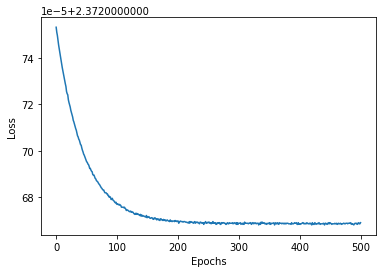

In [87]:
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [88]:
y

tensor([1., 5., 2., 5.])

In [92]:
yhat

tensor([0.9876, 0.9479, 1.1633, 2.5255], grad_fn=<SqueezeBackward0>)